In [227]:
import numpy as np
import plotnine
import pandas as pd
from plotnine import *

In [228]:
from google.colab import files
uploaded = files.upload()

Saving avocado-updated-2020.csv to avocado-updated-2020 (3).csv


In [229]:
avocados = pd.read_csv('avocado-updated-2020.csv')

**1. Describe the Data**

The avocado prices dataset shows weekly sales information for Hass avocados in different parts of the U.S. from 2015 to 2018. It includes data on the average price, total number sold, and how many were sold in each size category (small, large, and extra large). It also tells whether the avocados were organic or conventional, and lists the region and date for each record. This information helps show how avocado prices and sales changed over time and across different areas.

In [230]:
avocados = avocados.rename(columns= {
    "4046": "small",
    "4225": "large",
    "4770": "Xlarge"
})

In [231]:
avocados.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [232]:
avocados['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

Create new variable to group the geography locastions into a geo_type variable.

In [233]:
geo_map = {
    "Total U.S.": "US",

    "West Tex/New Mexico": "region",
    "West": "region",
    "Northeast": "region",
    "Southeast": "region",
    "South Central": "region",
    "Midsouth": "region",
    "Great Lakes": "region",
    "Plains": "region",

    "California": "state",
    "South Carolina": "state",
}

# everything else = city
avocados["geo_type"] = avocados["geography"].map(geo_map).fillna("city")

In [234]:
avocados.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city


Melt data into Long form for "size"

In [235]:
size_map = {
    "small": "small",
    "large": "large",
    "Xlarge": "Xlarge"
}

# only melt the PLU columns that actually exist
present_plu = [plu for plu in size_map if plu in avocados.columns]
id_vars = avocados.columns.difference(present_plu, sort=False)

avocados_long = (
    avocados.melt(id_vars=id_vars, value_vars=present_plu,
                  var_name="plu", value_name="units")
            .assign(size=lambda d: d["plu"].map(size_map))
            .drop(columns="plu")
)

In [236]:
avocados_long.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city,2819.50,small
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city,57.42,small
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city,364302.39,small
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city,1500.15,small
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city,53987.31,small


**Exercises**

Which major geographical region sold the most total organic, small Hass avocados in 2017?



In [237]:
org_sm_2017 = avocados_long[(avocados_long['year'] == 2017) &
 (avocados_long['type'] == 'organic') &
  (avocados_long['size'] == 'small') & (avocados_long['geo_type'] != 'US')]

org_sm_2017.sort_values('units', ascending=False).head(10)

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
12046,2017-02-19,1.43,592952.35,102105.79,91672.29,10433.50,0.0,organic,2017,Northeast,region,127051.75,small
12044,2017-02-19,1.36,420410.54,30805.24,29223.40,1581.84,0.0,organic,2017,New York,city,100285.03,small
13280,2017-05-07,1.19,442825.93,286038.82,84763.47,201275.35,0.0,organic,2017,West,region,85438.01,small
13496,2017-05-21,1.52,252331.06,131259.05,19903.15,111355.90,0.0,organic,2017,West,region,72450.49,small
13388,2017-05-14,1.10,446864.94,328333.53,160414.47,167919.06,0.0,organic,2017,West,region,64155.43,small
13604,2017-05-28,1.48,276578.14,159241.11,22367.60,136873.51,0.0,organic,2017,West,region,64107.88,small
13172,2017-04-30,1.40,259279.19,146041.51,37095.98,108945.53,0.0,organic,2017,West,region,61897.14,small
12308,2017-03-05,0.99,367519.17,251101.90,112844.19,138257.71,0.0,organic,2017,West,region,61166.48,small
13820,2017-06-11,1.59,260068.85,159121.26,29519.07,129602.19,0.0,organic,2017,West,region,52927.66,small
12726,2017-04-02,1.14,169883.35,112789.76,101411.38,11378.38,0.0,organic,2017,South Central,region,50715.72,small


**Northeast**

Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [238]:
avocados['month'] = pd.DatetimeIndex(avocados['date']).month
avocados['day'] = pd.DatetimeIndex(avocados['date']).day
avocados['year'] = pd.DatetimeIndex(avocados['date']).year
avocados.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city,1,4


In [239]:
avocados.groupby('month')['total_volume'].mean().sort_values(ascending=False)


,total_volume
month,
5,1.123632e+06
2,1.095374e+06
6,1.051247e+06
4,1.016582e+06
3,9.957150e+05
1,9.853122e+05
7,9.832681e+05
8,9.499249e+05
9,9.064773e+05


**May**

Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [240]:
avocados_metro = avocados_long[avocados_long['geo_type'] == 'city']
avocados_metro.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city,2819.50,small
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city,57.42,small
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city,364302.39,small
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city,1500.15,small
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city,53987.31,small


In [241]:
avocados_metro.groupby('geography')['units'].mean().sort_values(ascending=False).head(5)

,units
geography,
Los Angeles,291520.101776
New York,193618.226710
Dallas/Ft. Worth,156090.855741
Houston,146397.885703
Phoenix/Tucson,139964.304684


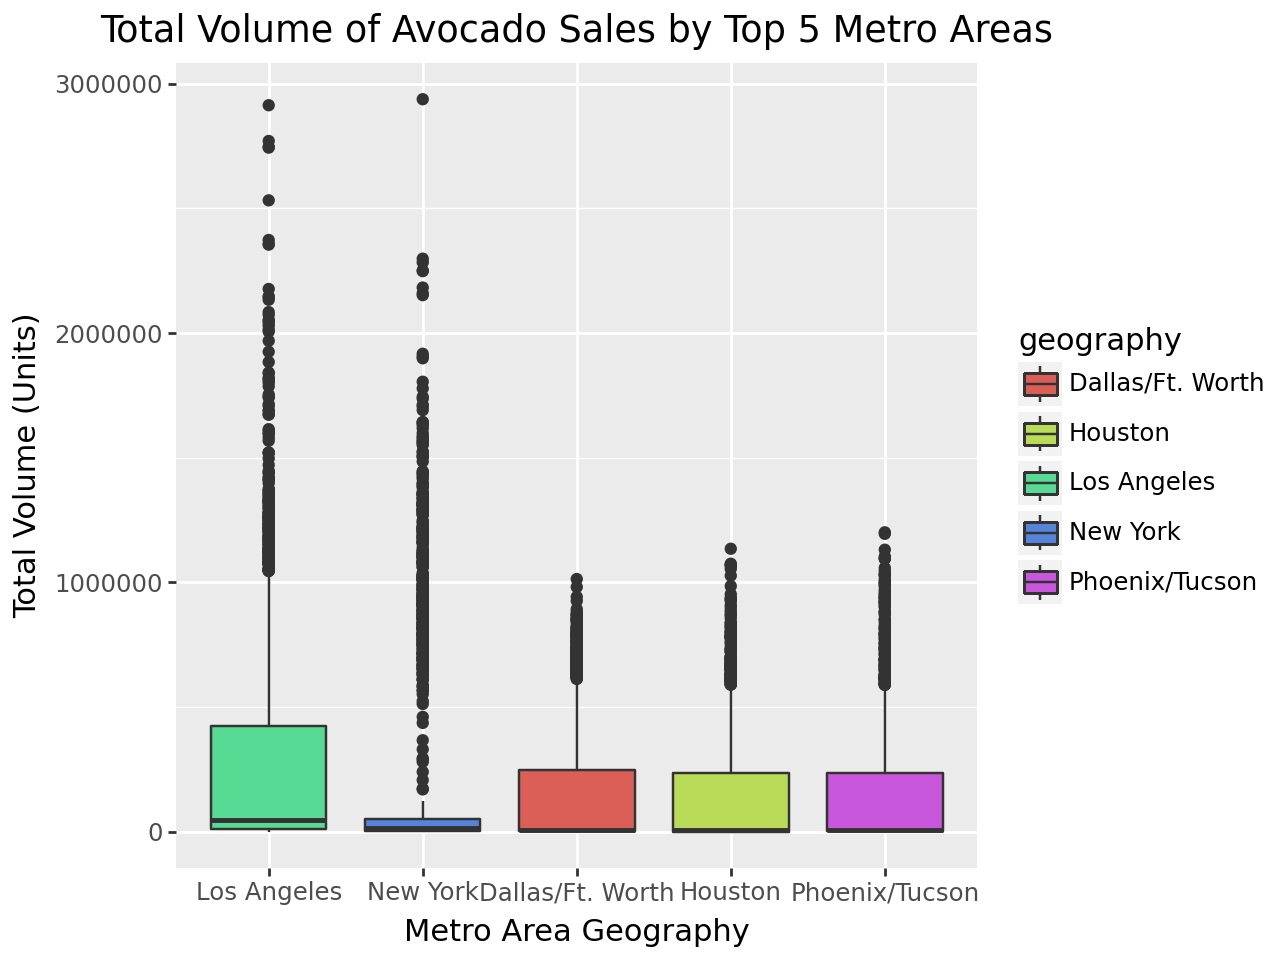

In [242]:
# Get the top 5 metro geographies based on mean units sold
top5_geographies = avocados_metro.groupby('geography')['units'].mean().sort_values(ascending=False).head(5).index.tolist()

# Filter to include only the top 5
avocados_top5 = avocados_metro[avocados_metro['geography'].isin(top5_geographies)]

# Calculate the order based on the mean units
geography_order = avocados_top5.groupby('geography')['units'].mean().sort_values(ascending=False).index.tolist()


# Create the box plot
(
    ggplot(avocados_top5, aes(x='geography', y='units', fill='geography'))
    + geom_boxplot()
    + scale_x_discrete(limits=geography_order) # Reorder x-axis based on mean units
    + labs(x='Metro Area Geography', y='Total Volume (Units)', title='Total Volume of Avocado Sales by Top 5 Metro Areas')

)

From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [243]:
california_geographies = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
avocados_ca_long = avocados_long[avocados_long['geography'].isin(california_geographies)]
avocados_ca_long.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
44,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,city,1837999.65,small
45,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,city,47721.51,small
80,2015-01-04,1.05,430138.88,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,city,110693.69,small
81,2015-01-04,1.33,9213.49,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,city,3727.52,small
82,2015-01-04,0.94,461607.33,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,city,244152.26,small


In [244]:
california_geographies = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
avocados_ca_wide = avocados[avocados['geography'].isin(california_geographies)]
avocados_ca_wide.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,city,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,city,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,city,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,city,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,city,1,4


In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [245]:
avocados_ca_wide.groupby(['geography'])[["average_price"]].mean().sort_values('average_price', ascending=False)

,average_price
geography,
San Francisco,1.759967
Sacramento,1.584608
San Diego,1.456111
Los Angeles,1.311013


In [246]:
avo_ca_mean = avocados_ca_wide.groupby(['geography'])[["average_price"]].mean().sort_values('average_price', ascending=False)


In [247]:
avo_ca_mean.head()

,average_price
geography,
San Francisco,1.759967
Sacramento,1.584608
San Diego,1.456111
Los Angeles,1.311013


In [248]:
avocados_ca_type_mean = avocados_ca_wide.groupby(['geography', 'type'])['average_price'].mean().unstack()

avocados_ca_type_mean['price_difference'] = avocados_ca_type_mean['organic'] - avocados_ca_type_mean['conventional']

print("Average price of organic vs conventional avocados and their difference:")
display(avocados_ca_type_mean.sort_values('price_difference', ascending=False))

Average price of organic vs conventional avocados and their difference:


type,conventional,organic,price_difference
geography,,,
San Francisco,1.400490,2.119444,0.718954
San Diego,1.113856,1.798366,0.684510
Sacramento,1.295359,1.873856,0.578497
Los Angeles,1.047124,1.574902,0.527778


**San Francisco**

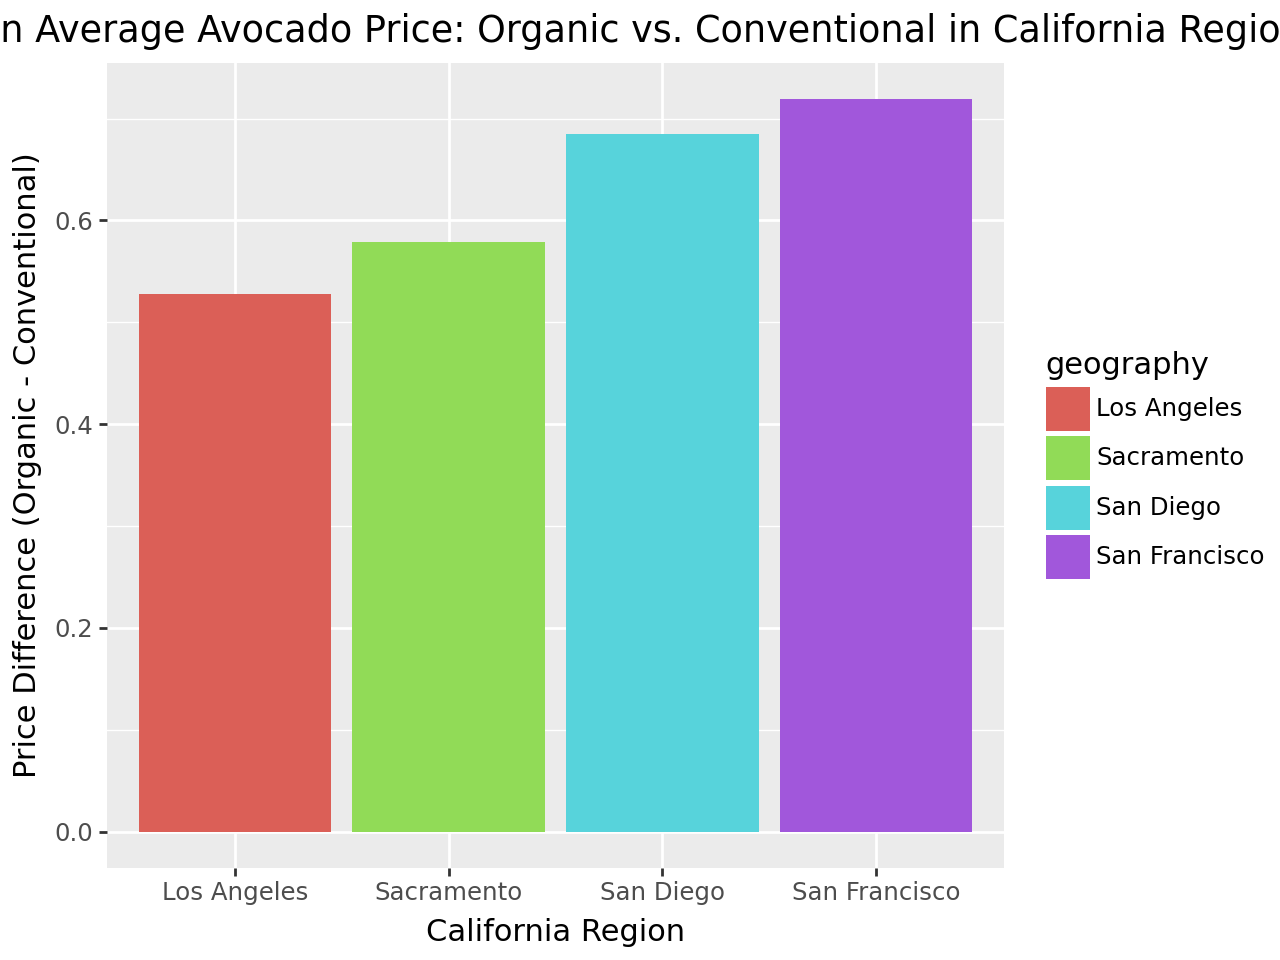

In [249]:
(
    ggplot(avocados_ca_type_mean.reset_index(), aes(x='geography', y='price_difference', fill='geography'))
    + geom_bar(stat='identity')
    + labs(x='California Region', y='Price Difference (Organic - Conventional)', title='Difference in Average Avocado Price: Organic vs. Conventional in California Regions')

)

The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [250]:
# Group by geography, type, and size, then sum the units
avocados_ca_grouped = avocados_ca_long.groupby(['geography', 'type', 'size'])['units'].sum().reset_index()

# Calculate the total units sold for each geography and type
avocados_ca_total = avocados_ca_long.groupby(['geography', 'type'])['units'].sum().reset_index(name='total_units')

# Merge the grouped data with the total units
avocados_ca_proportions = pd.merge(avocados_ca_grouped, avocados_ca_total, on=['geography', 'type'])

# Calculate the proportion of each size
avocados_ca_proportions['proportion'] = avocados_ca_proportions['units'] / avocados_ca_proportions['total_units']

# Display the resulting DataFrame with proportions
display(avocados_ca_proportions)

,geography,type,size,units,total_units,proportion
0,Los Angeles,conventional,Xlarge,2.970453e+07,5.244437e+08,0.056640
1,Los Angeles,conventional,large,1.358157e+08,5.244437e+08,0.258971
2,Los Angeles,conventional,small,3.589234e+08,5.244437e+08,0.684389
3,Los Angeles,organic,Xlarge,1.846800e+03,1.078721e+07,0.000171
4,Los Angeles,organic,large,6.366092e+06,1.078721e+07,0.590152
5,Los Angeles,organic,small,4.419272e+06,1.078721e+07,0.409677
6,Sacramento,conventional,Xlarge,1.937984e+06,1.195302e+08,0.016213
7,Sacramento,conventional,large,7.435955e+07,1.195302e+08,0.622099
8,Sacramento,conventional,small,4.323263e+07,1.195302e+08,0.361688
9,Sacramento,organic,Xlarge,2.364400e+02,2.170262e+06,0.000109


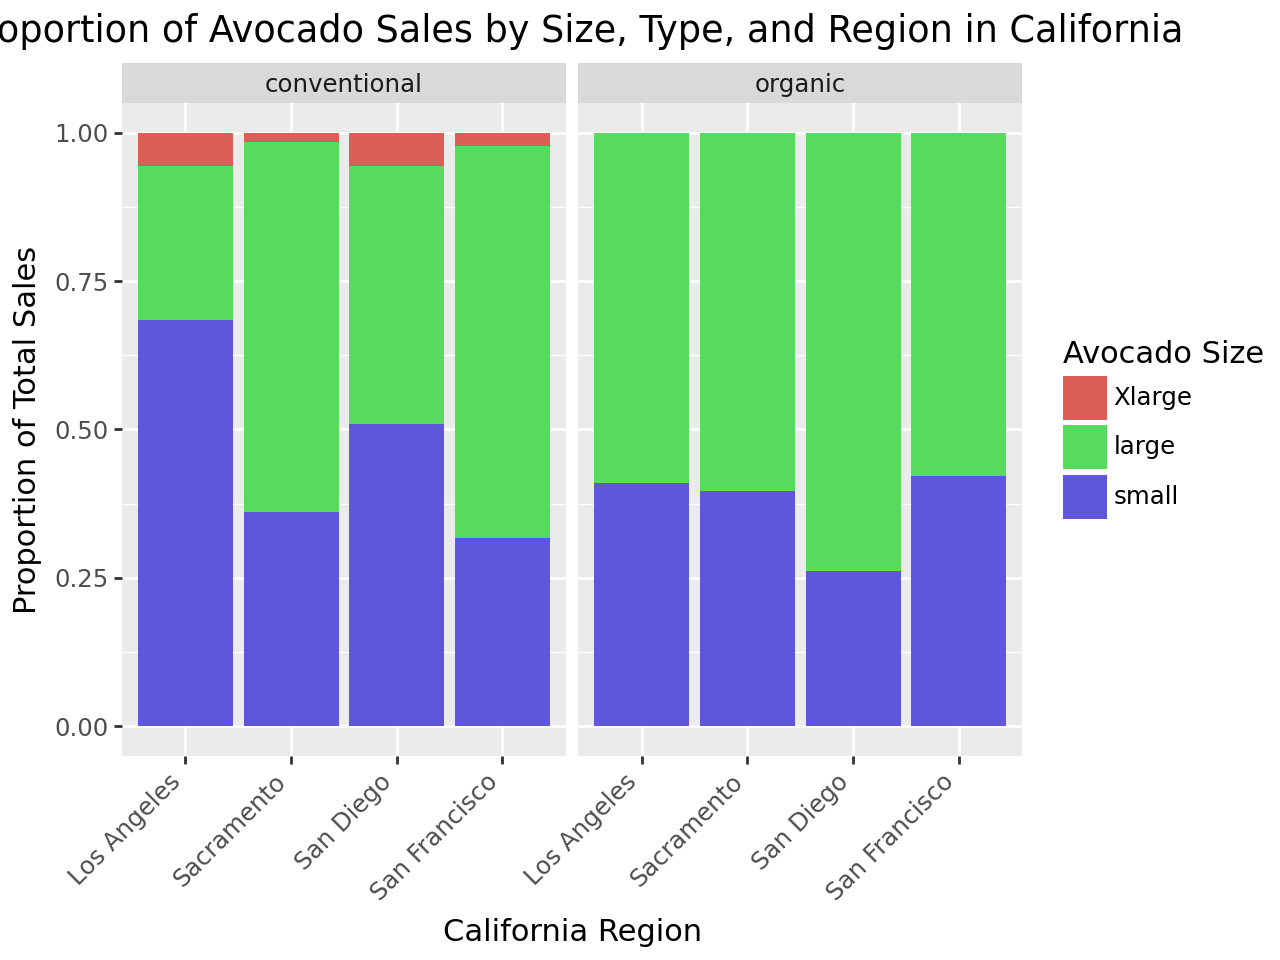

In [251]:
# Create the plot using the calculated proportions
(
    ggplot(avocados_ca_proportions, aes(x='geography', y='proportion', fill='size'))
    + geom_bar(stat='identity')
    + facet_wrap('~ type')
    + labs(x='California Region', y='Proportion of Total Sales', fill='Avocado Size',
           title='Proportion of Avocado Sales by Size, Type, and Region in California')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

Using Outside Data

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or assemble a data set of real data, with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [252]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (4).csv


In [253]:
housing = pd.read_csv('housing (3).csv')
housing.head()

,Region,2015,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,...,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10,2018.11
0,"Los Angeles, CA metro area",$465K,$470K,$480K,$495K,$494K,$507K,$505K,$510K,$499K,...,$601K,$610K,$630K,$632K,$627K,$628K,$615K,$612K,$622K,$600K
1,"Sacramento, CA metro area",$285K,$310K,$305K,$315K,$325K,$325K,$319K,$318K,$315K,...,$394K,$399K,$409K,$410K,$405K,$399K,$400K,$394K,$393K,$395K
2,"San Diego, CA metro area",$442K,$442K,$460K,$460K,$469K,$480K,$480K,$470K,$464K,...,$560K,$575K,$575K,$580K,$587K,$585K,$581K,$560K,$560K,$565K
3,"San Francisco, CA metro area",$925K,"$1,050K","$1,100K","$1,115K","$1,195K","$1,139K","$1,145K","$1,113K","$1,088K",...,"$1,400K","$1,430K","$1,418K","$1,415K","$1,400K","$1,375K","$1,403K","$1,400K","$1,325K","$1,340K"


In [254]:
housing_long = (
    housing.melt(id_vars="Region", value_vars=housing.columns[1:],
                  var_name="date", value_name="price_str") # Renamed var_name to 'date' and value_name to 'price_str' for clarity

)
display(housing_long.head())

,Region,date,price_str
0,"Los Angeles, CA metro area",2015,$465K
1,"Sacramento, CA metro area",2015,$285K
2,"San Diego, CA metro area",2015,$442K
3,"San Francisco, CA metro area",2015,$925K
4,"Los Angeles, CA metro area",2015.1,$470K


In [255]:
housing_long["date"] = pd.to_numeric(housing_long["date"], errors="coerce").fillna(0).astype(int)

In [256]:
housing_long.head()

,Region,date,price_str
0,"Los Angeles, CA metro area",2015,$465K
1,"Sacramento, CA metro area",2015,$285K
2,"San Diego, CA metro area",2015,$442K
3,"San Francisco, CA metro area",2015,$925K
4,"Los Angeles, CA metro area",2015,$470K


In [257]:
# Clean and convert the 'price_str' column to numeric using the parse_price function
housing_long["price_numeric"] = housing_long["price_str"].apply(parse_price)

# Display the first few rows to verify the new numeric price column
display(housing_long.head())

,Region,date,price_str,price_numeric
0,"Los Angeles, CA metro area",2015,$465K,465000.0
1,"Sacramento, CA metro area",2015,$285K,285000.0
2,"San Diego, CA metro area",2015,$442K,442000.0
3,"San Francisco, CA metro area",2015,$925K,925000.0
4,"Los Angeles, CA metro area",2015,$470K,470000.0


In [265]:
housing_long["geography"] = housing_long["Region"].astype(str).str.replace(r",.*$", "", regex=True).str.strip()
housing_long["year"] = housing_long["date"]
display(housing_long)

,Region,date,price_str,price_numeric,geography,year
0,"Los Angeles, CA metro area",2015,$465K,465000.0,Los Angeles,2015
1,"Sacramento, CA metro area",2015,$285K,285000.0,Sacramento,2015
2,"San Diego, CA metro area",2015,$442K,442000.0,San Diego,2015
3,"San Francisco, CA metro area",2015,$925K,925000.0,San Francisco,2015
4,"Los Angeles, CA metro area",2015,$470K,470000.0,Los Angeles,2015
...,...,...,...,...,...,...
187,"San Francisco, CA metro area",2018,"$1,325K",1325000.0,San Francisco,2018
188,"Los Angeles, CA metro area",2018,$600K,600000.0,Los Angeles,2018
189,"Sacramento, CA metro area",2018,$395K,395000.0,Sacramento,2018
190,"San Diego, CA metro area",2018,$565K,565000.0,San Diego,2018


In [266]:
# Group by year and geography and sum the price_numeric
housing_yearly_geo = housing_long.groupby(['year', 'geography'])['price_numeric'].sum().reset_index()

# Display the resulting DataFrame
display(housing_yearly_geo.head())

,year,geography,price_numeric
0,2015,Los Angeles,5930000.0
1,2015,Sacramento,3775000.0
2,2015,San Diego,5573000.0
3,2015,San Francisco,13247000.0
4,2016,Los Angeles,6368000.0


In [267]:
# Filter avocado data for the four California regions and years 2015-2018
avocados_ca_2015_2018 = avocados_long[(avocados_long['geography'].isin(CITIES)) &
                                     (avocados_long['year'] >= 2015) &
                                     (avocados_long['year'] <= 2018)].copy()

# Aggregate to annual total units
avo_annual = avocados_ca_2015_2018.groupby(['geography', 'year'])['units'].sum().reset_index(name='total_units')

# Display the annual avocado data
display(avo_annual.head(20))

,geography,year,total_units
0,Los Angeles,2015,1.269232e+08
1,Los Angeles,2016,9.554469e+07
2,Los Angeles,2017,9.441289e+07
3,Los Angeles,2018,8.349983e+07
4,Sacramento,2015,1.954109e+07
5,Sacramento,2016,2.026762e+07
6,Sacramento,2017,2.052570e+07
7,Sacramento,2018,2.258708e+07
8,San Diego,2015,2.372747e+07
9,San Diego,2016,1.899298e+07


In [268]:
# Merge the annual avocado and housing dataframes
avo_housing_joined = pd.merge(avo_annual, housing_yearly_geo, on=['geography', 'year'], how='inner')

# Display the joined dataframe
display(avo_housing_joined.head())

,geography,year,total_units,price_numeric
0,Los Angeles,2015,1.269232e+08,5930000.0
1,Los Angeles,2016,9.554469e+07,6368000.0
2,Los Angeles,2017,9.441289e+07,6875000.0
3,Los Angeles,2018,8.349983e+07,7347000.0
4,Sacramento,2015,1.954109e+07,3775000.0


In [269]:
avo_housing_joined = avo_housing_joined.rename(columns={'price_numeric': 'total_house_price', 'total_units': 'total_avocado_units'})
display(avo_housing_joined.head(20))

,geography,year,total_avocado_units,total_house_price
0,Los Angeles,2015,1.269232e+08,5930000.0
1,Los Angeles,2016,9.554469e+07,6368000.0
2,Los Angeles,2017,9.441289e+07,6875000.0
3,Los Angeles,2018,8.349983e+07,7347000.0
4,Sacramento,2015,1.954109e+07,3775000.0
5,Sacramento,2016,2.026762e+07,4096000.0
6,Sacramento,2017,2.052570e+07,4419000.0
7,Sacramento,2018,2.258708e+07,4748000.0
8,San Diego,2015,2.372747e+07,5573000.0
9,San Diego,2016,1.899298e+07,5943000.0


In [270]:
avo_housing_joined['money_on_housing/avocados_sold'] = avo_housing_joined['total_house_price'] / avo_housing_joined['total_avocado_units']
avo_housing_joined.head()

,geography,year,total_avocado_units,total_house_price,money_on_housing/avocados_sold
0,Los Angeles,2015,1.269232e+08,5930000.0,0.046721
1,Los Angeles,2016,9.554469e+07,6368000.0,0.066649
2,Los Angeles,2017,9.441289e+07,6875000.0,0.072818
3,Los Angeles,2018,8.349983e+07,7347000.0,0.087988
4,Sacramento,2015,1.954109e+07,3775000.0,0.193183


In [ ]:
la_total_units = avo_housing_joined[avo_housing_joined['geography'] == 'Los Angeles']['total_avocado_units'].sum()
la_total_price = avo_housing_joined[avo_housing_joined['geography'] == 'Los Angeles']['total_house_price'].sum()

# Calculate the average price per unit for Los Angeles
la_avg_price_per_unit = la_total_price / la_total_units

(
    ggplot(avo_housing_joined, aes(x='year', y=''))
    + geom_line()
    + labs(x='California Region', y='Proportion of Total Sales', fill='Avocado Size',
           title='Proportion of Avocado Sales by Size, Type, and Region in California')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

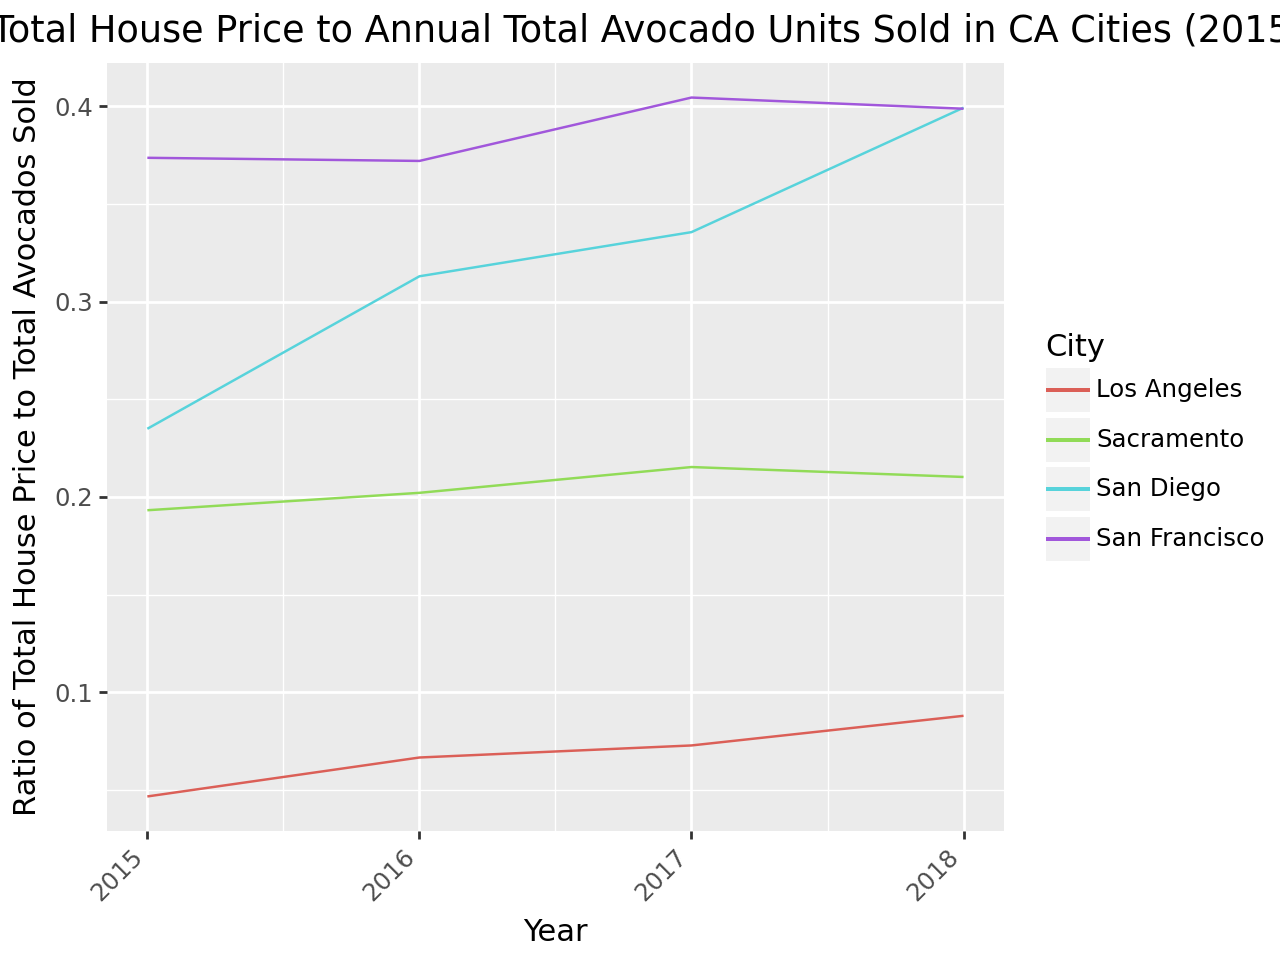

In [276]:

(
    ggplot(avo_housing_joined, aes(x='year', y='money_on_housing/avocados_sold', color='geography')) # Changed fill to color for line plot
    + geom_line()
    + labs(x='Year', y='Ratio of Total House Price to Total Avocados Sold', color='City', # Updated y-axis label and legend title
           title='Ratio of Annual Total House Price to Annual Total Avocado Units Sold in CA Cities (2015-2018)') # Updated plot title
    + theme(axis_text_x=element_text(rotation=45, hjust=1)
    # Removed the line with syntax error:
    # + legend_box=element_rect(fill='geography', color='black', size=10)
))

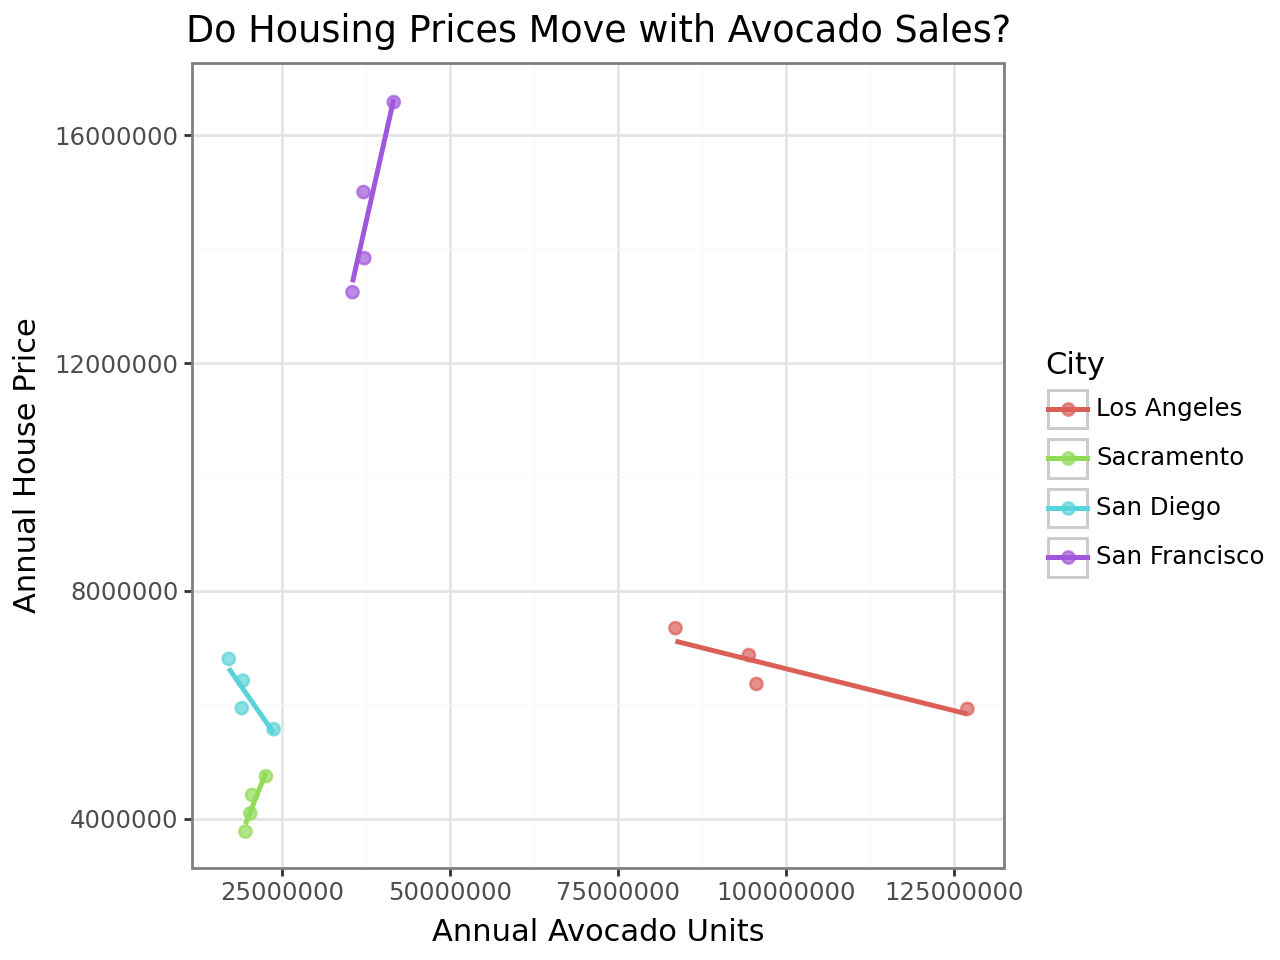

In [279]:
avo_housing_joined["year"] = pd.to_numeric(avo_housing_joined["year"], errors="coerce")

(
    ggplot(avo_housing_joined,
           aes(x="total_avocado_units", y="total_house_price", color="geography"))
    + geom_point(alpha=0.7, size=2)
    + geom_smooth(method="lm", se=False)   # linear trend = visual correlation
    + theme_bw()
    + labs(title="Do Housing Prices Move with Avocado Sales?",
           x="Annual Avocado Units",
           y="Annual House Price",
           color="City")
)

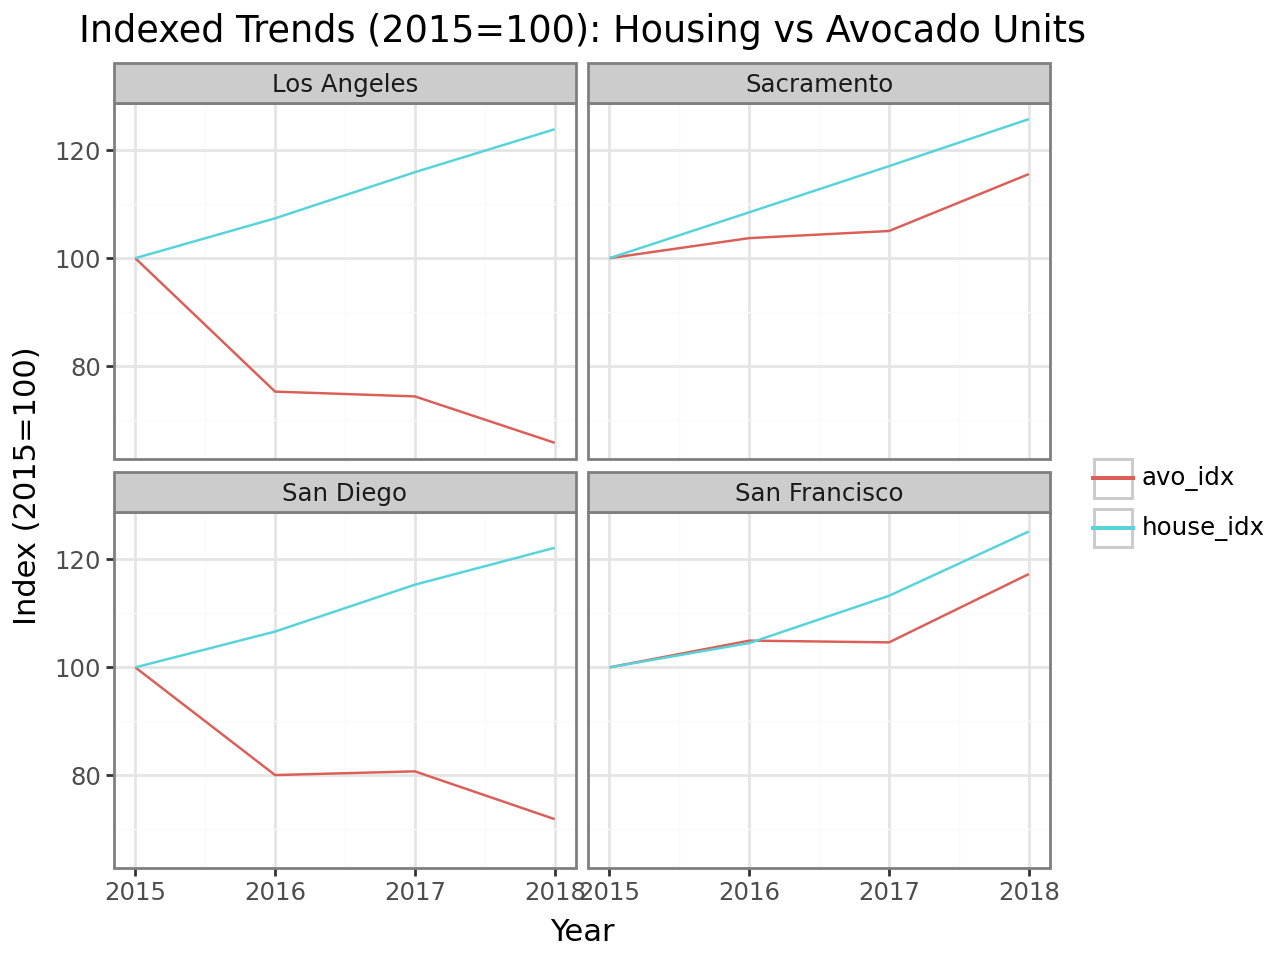

In [281]:
tmp = (avo_housing_joined
       .sort_values(["geography","year"])
       .copy())

# index each series within each city (first year = 100)
tmp["house_idx"] = tmp.groupby("geography")["total_house_price"].transform(lambda s: 100*s/s.iloc[0])
tmp["avo_idx"]   = tmp.groupby("geography")["total_avocado_units"].transform(lambda s: 100*s/s.iloc[0])

plot_df = tmp.melt(id_vars=["geography","year"],
                   value_vars=["house_idx","avo_idx"],
                   var_name="series", value_name="index")

(
    ggplot(plot_df, aes(x="year", y="index", color="series"))
    + geom_line()
    + facet_wrap("~geography")
    + theme_bw()
    + labs(title="Indexed Trends (2015=100): Housing vs Avocado Units",
           x="Year", y="Index (2015=100)", color="")
)



In [283]:
corr = (avo_housing_joined.groupby(["geography","year"], as_index=False)
               .agg(house=("total_house_price","mean"),
                    units=("total_avocado_units","sum"))
               .groupby("geography")
               .apply(lambda d: d["house"].corr(d["units"]))
               .reset_index(name="corr_house_vs_units"))
print(corr)


       geography  corr_house_vs_units
0    Los Angeles            -0.896140
1     Sacramento             0.930619
2      San Diego            -0.886373
3  San Francisco             0.935959


/tmp/ipython-input-513916837.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In the indexed plot, housing prices rise steadily in all four cities from 2015–2018, while avocado sales move differently by city (falling in Los Angeles/San Diego, drifting/then rising in Sacramento/SF). The correlations reflect that split: negative house–units correlations in LA (−0.90) and San Diego (−0.89), but positive in Sacramento (+0.93) and San Francisco (+0.94). Because the sign flips across cities and housing climbs regardless of avocado sales, there’s no consistent relationship indicating that avocado purchasing is tied to home-price increases. At best, the mixed patterns suggest both series are driven by independent local factors, not by Millennials’ avocado spending.